In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import math as m
from time import time
from scipy import stats

-------

In [5]:
S0 = 80.; K = 85.; T = 1.0; r = 0.05; # q = 0.0;
sigma = 0.2

In [6]:
ref_pv = 5.98824380

$ C_0 = E\left[ e^{-rT} max(0, S_T - K) \right] $

$S(t) = S(t-\Delta t) \exp(r t - \frac{1}{2} \sigma^2 t + \sigma W_t )$

In [19]:
def mc_euro_call_pv_with_paths0(S0, K, T, r, sigma, M, I):
    # Simulating I paths with M time steps
    S = np.zeros((M + 1, I))
    S[0] = S0
    dt = float(T) / M
    for t in range(1, M + 1):
        z = np.random.standard_normal(I)
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * m.sqrt(dt) * z)

    # PV is extected discounted payoff
    C = np.sum(m.exp(-r * T) * np.maximum(S[-1] - K, 0)) / I
    return C, S

def standard_normal(I):
    z = np.random.standard_normal(I)
    mean = np.mean(z)
    std = np.std(z)
    return (z - mean)/std    

def mc_euro_call_pv_with_paths(S0, K, T, r, sigma, M, I):
    # Simulating I paths with M time steps
    S = np.zeros((M + 1, I))
    S[0] = S0
    dt = float(T) / M
    for t in range(1, M + 1):
        z = standard_normal(I)
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * m.sqrt(dt) * z)

    # PV is extected discounted payoff
    C = np.sum(m.exp(-r * T) * np.maximum(S[-1] - K, 0)) / I
    return C, S


In [20]:
# Parameters
M = 360; I = 50000

In [21]:
np.random.seed(12345)
t0 = time()
C, SPaths = mc_euro_call_pv_with_paths0(S0, K, T, r, sigma, M, I)
calcTime = time() - t0

print( "PV: %.5f, abs diff: %.5f, rel diff:  %.5f" % (C, ref_pv - C, (ref_pv - C)/C) )
print( "Calculation time   %.5f" % calcTime )

np.random.seed(12345)
t0 = time()
C, SPaths = mc_euro_call_pv_with_paths(S0, K, T, r, sigma, M, I)
calcTime = time() - t0

print( "PV: %.5f, abs diff: %.5f, rel diff:  %.5f" % (C, ref_pv - C, (ref_pv - C)/C) )
print( "Calculation time   %.5f" % calcTime )

PV: 5.95967, abs diff: 0.02858, rel diff:  0.00480
Calculation time   1.83522
PV: 5.98041, abs diff: 0.00784, rel diff:  0.00131
Calculation time   2.21848


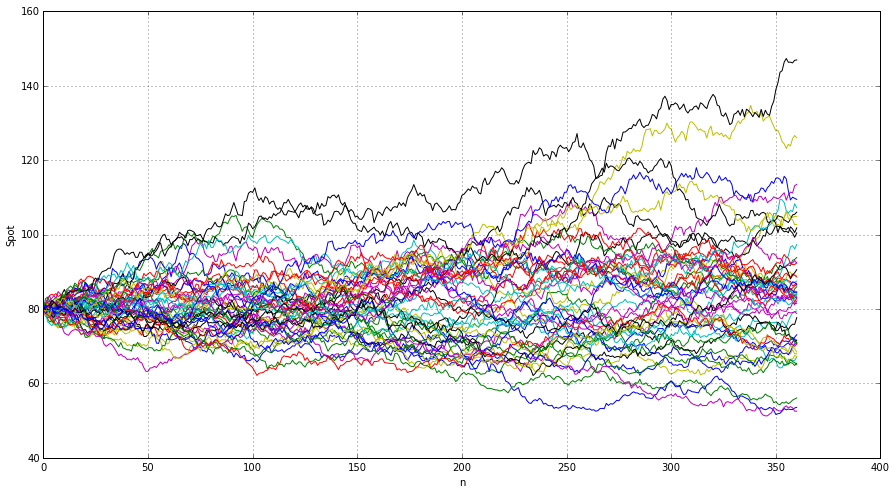

In [22]:
plt.figure(figsize=(15,8))
plt.plot(SPaths[:, :50])
plt.grid(True)
plt.xlabel('n')
plt.ylabel('Spot')

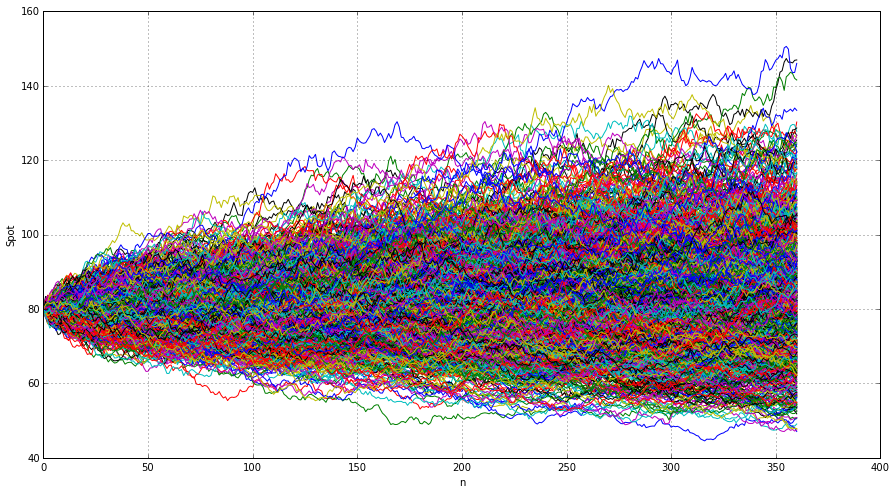

In [23]:
plt.figure(figsize=(15,8))
plt.plot(SPaths[:, :1000])
plt.grid(True)
plt.xlabel('n')
plt.ylabel('Spot')

In [24]:
def mc_euro_call_pv_no_paths(S0, K, T, r, sigma, I):
    # Simulating I values
    z = standard_normal(I)
    S = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * m.sqrt(T) * z)

    # payoff
    P = np.maximum(S - K, 0)
    # PV as expected discounted payoff
    C = np.sum( m.exp(-r * T) * P ) / I
    return C, S

np.random.seed(12345)
t0 = time()
C, S = mc_euro_call_pv_no_paths(S0, K, T, r, sigma, I)
calcTime = time() - t0

print( "PV: %.5f, abs diff: %.5f, rel diff:  %.5f" % (C, ref_pv - C, (ref_pv - C)/C) )
print( "Calculation time   %.5f" % calcTime )

PV: 5.98935, abs diff: -0.00110, rel diff:  -0.00018
Calculation time   0.00800


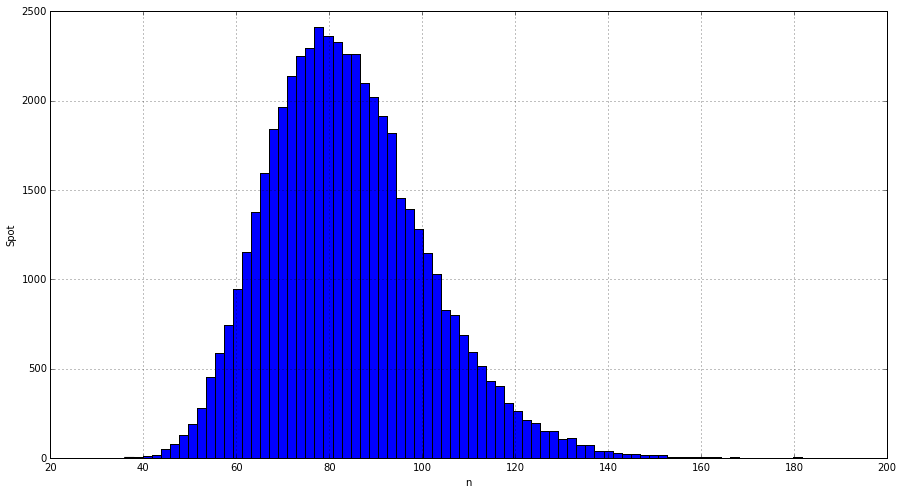

In [17]:
plt.figure(figsize=(15,8))
plt.hist(S, 75)
plt.grid(True)
plt.xlabel('n')
plt.ylabel('Spot')

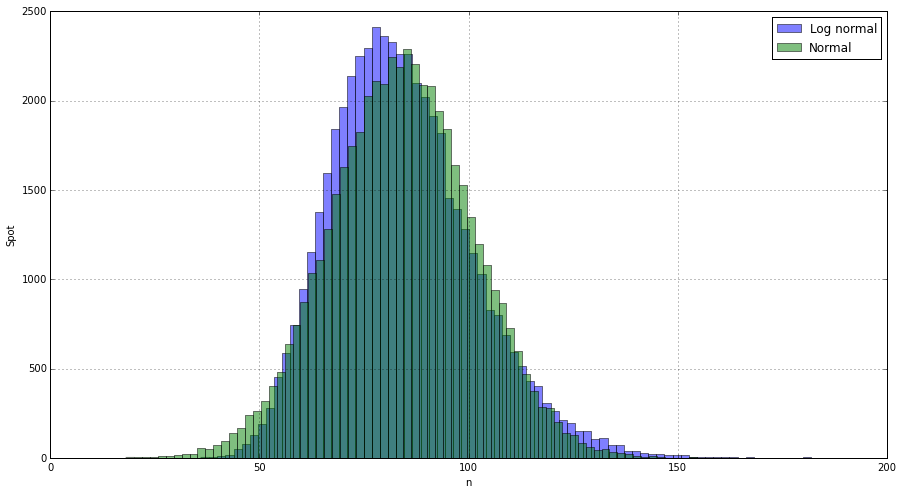

In [25]:
z = standard_normal(I)
z = z * np.std(S)
z = z + np.mean(S)

plt.figure(figsize=(15,8))
plt.hist(S, 75, alpha=0.5, label='Log normal')
plt.hist(z, 75, alpha=0.5, label='Normal')

plt.legend(loc='upper right')
plt.grid(True)
plt.xlabel('n')
plt.ylabel('Spot')

In [27]:
print( "Expected mean: %.5f, mean: %.5f" % (S0 * m.exp(r*T), np.mean(S)) )
print( "Expected std: %.5f, std:  %.5f" % ( S0* m.exp(r*T ) * m.sqrt(m.exp( sigma * sigma *T ) - 1) , np.std(S)) )
# Std formular: https://en.wikipedia.org/wiki/Geometric_Brownian_motion#Properties

Expected mean: 84.10169, mean: 84.09980
Expected std: 16.98995, std:  16.95558
